In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, random_split
import torchvision.datasets as datasets
import os
%matplotlib inline

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
plt.rcParams['axes.grid'] = True

In [12]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))
num_epochs = 1
num_temps = 100
max_bce = []

In [13]:
def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

In [24]:
Jd = 0.0
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

In [33]:
Jd = -0.5
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}.npy', 'rb') as f:
    outs_80 = np.load(f)

In [34]:
Jd = -0.5

num_temps = 100
T_c = get_crit_T[Jd]
T_cl = np.round(np.linspace(T_c - 10**-2.0, T_c + 10**-2.0, num_temps), 5) 

num_epochs = 1

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_close.npy', 'rb') as f:
    errs_10_cl = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_close.npy', 'rb') as f:
    outs_10_cl = np.load(f) 
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_close.npy', 'rb') as f:
    errs_20_cl = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_close.npy', 'rb') as f:
    outs_20_cl = np.load(f)

L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_close.npy', 'rb') as f:
    errs_30_cl = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_close.npy', 'rb') as f:
    outs_30_cl = np.load(f)

L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_close.npy', 'rb') as f:
    errs_60_cl = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_close.npy', 'rb') as f:
    outs_60_cl = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_close.npy', 'rb') as f:
    errs_80_cl = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs_close.npy', 'rb') as f:
    outs_80_cl = np.load(f) 

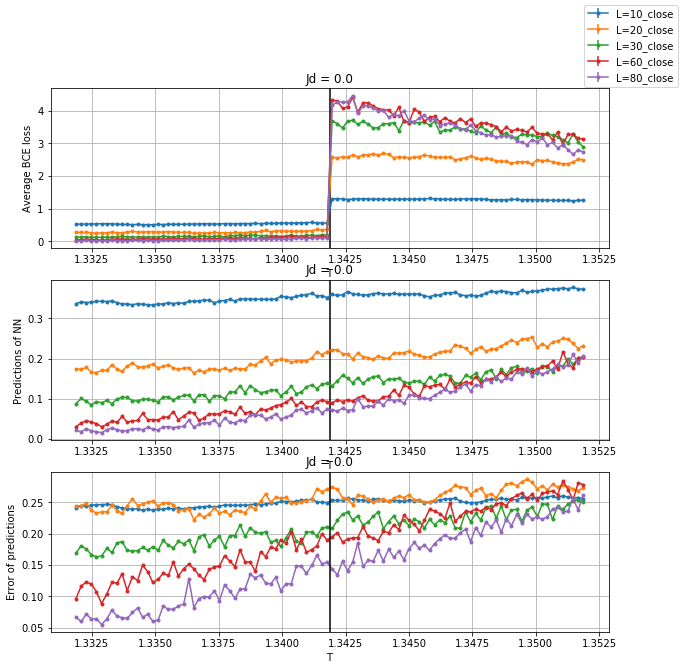

In [23]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

#ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T_cl, errs(errs_10_cl), yerr=stds_err(errs_10_cl)/1000, marker='.', label='L=10_close')
ax[0].errorbar(T_cl, errs(errs_20_cl), yerr=stds_err(errs_20_cl)/1000, marker='.', label='L=20_close')
ax[0].errorbar(T_cl, errs(errs_30_cl), yerr=stds_err(errs_30_cl)/1000, marker='.', label='L=30_close')
ax[0].errorbar(T_cl, errs(errs_60_cl), yerr=stds_err(errs_60_cl)/1000, marker='.', label='L=60_close')
ax[0].errorbar(T_cl, errs(errs_80_cl), yerr=stds_err(errs_80_cl)/1000, marker='.', label='L=80_close')

#ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T_cl, errs(outs_10_cl), yerr=stds_err(outs_10_cl)/1000, marker='.')
ax[1].errorbar(T_cl, errs(outs_20_cl), yerr=stds_err(outs_20_cl)/1000, marker='.')
ax[1].errorbar(T_cl, errs(outs_30_cl), yerr=stds_err(outs_30_cl)/1000, marker='.')
ax[1].errorbar(T_cl, errs(outs_60_cl), yerr=stds_err(outs_60_cl)/1000, marker='.')
ax[1].errorbar(T_cl, errs(outs_80_cl), yerr=stds_err(outs_80_cl)/1000, marker='.')

#ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T_cl, stds_err(outs_10_cl), marker='.')
ax[2].plot(T_cl, stds_err(outs_20_cl), marker='.')
ax[2].plot(T_cl, stds_err(outs_30_cl), marker='.')
ax[2].plot(T_cl, stds_err(outs_60_cl), marker='.')
ax[2].plot(T_cl, stds_err(outs_80_cl), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = 0.0')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

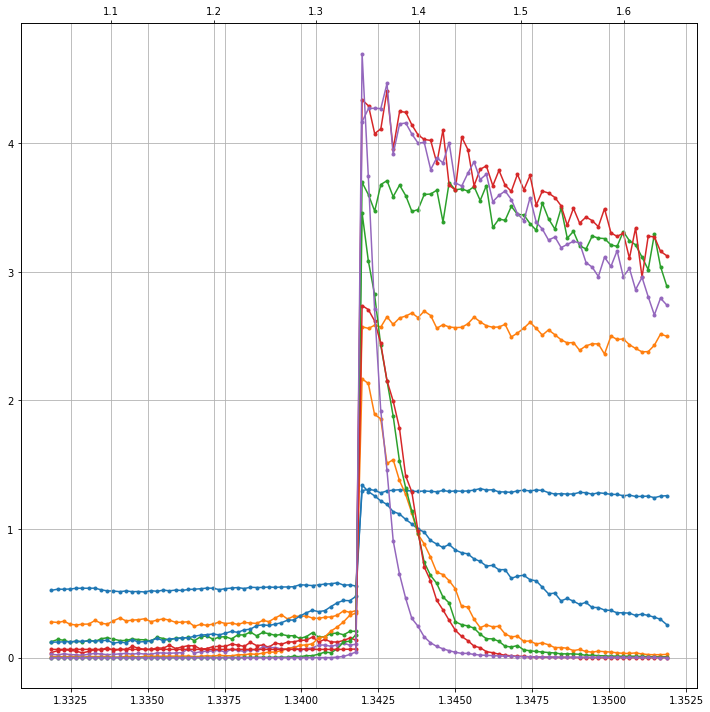

In [35]:
fig, ax1 = plt.subplots(figsize=(10,10))

#ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax1.errorbar(T_cl, errs(errs_10_cl), yerr=stds_err(errs_10_cl)/1000, marker='.', label='L=10_close')
ax1.errorbar(T_cl, errs(errs_20_cl), yerr=stds_err(errs_20_cl)/1000, marker='.', label='L=20_close')
ax1.errorbar(T_cl, errs(errs_30_cl), yerr=stds_err(errs_30_cl)/1000, marker='.', label='L=30_close')
ax1.errorbar(T_cl, errs(errs_60_cl), yerr=stds_err(errs_60_cl)/1000, marker='.', label='L=60_close')
ax1.errorbar(T_cl, errs(errs_80_cl), yerr=stds_err(errs_80_cl)/1000, marker='.', label='L=80_close')

ax2 = ax1.twiny()

ax2.errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax2.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax2.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax2.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
ax2.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')


fig.tight_layout()
plt.show()

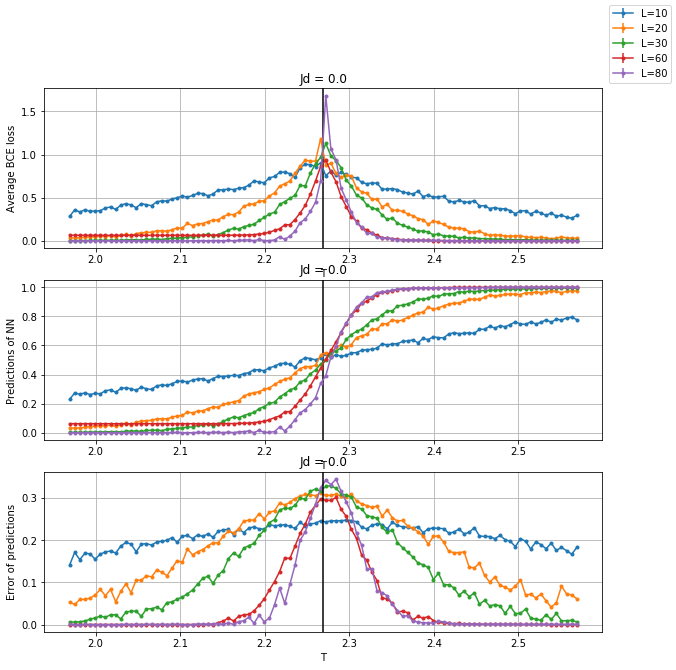

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_60), marker='.')
ax[2].plot(T, stds_err(outs_80), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = 0.0')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

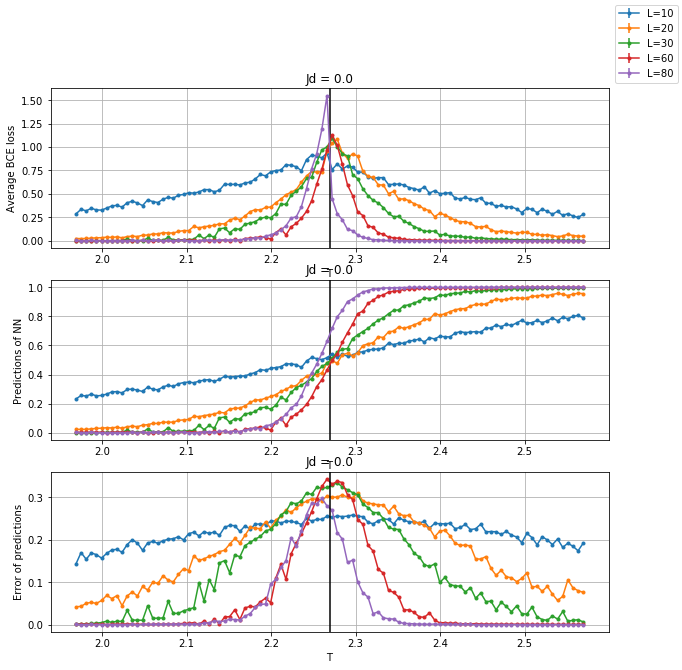

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_60), marker='.')
ax[2].plot(T, stds_err(outs_80), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = 0.0')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

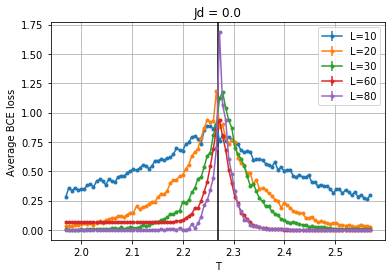

In [104]:
plt.errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

#plt.rcParams["figure.figsize"] = (10,6)

plt.title('Jd = 0.0')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/00_100_bce.png')

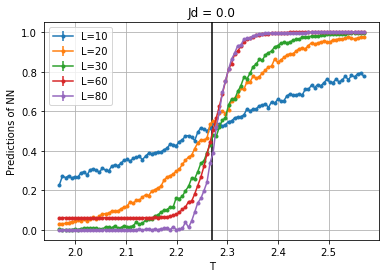

In [105]:
plt.errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', label='L=80')

plt.title('Jd = 0.0')
plt.xlabel('T')
plt.ylabel('Predictions of NN')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/00_100_pred.png')

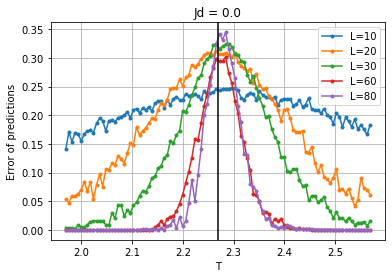

In [106]:
plt.plot(T, stds_err(outs_10), marker='.', label='L=10')
plt.plot(T, stds_err(outs_20), marker='.', label='L=20')
plt.plot(T, stds_err(outs_30), marker='.', label='L=30')
plt.plot(T, stds_err(outs_60), marker='.', label='L=60')
plt.plot(T, stds_err(outs_80), marker='.', label='L=80')

plt.title('Jd = 0.0')
plt.xlabel('T')
plt.ylabel('Error of predictions')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/00_100_ep.png')

In [107]:
######## -0.3 ########

In [108]:
Jd = -0.3

T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

In [15]:
'''fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_60), marker='.')
ax[2].plot(T, stds_err(outs_80), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.3')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()'''

"fig, ax = plt.subplots(3, 1, figsize=(10,10))\n\nax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')\nax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')\nax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')\nax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')\nax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')\n\nax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')\nax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')\nax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')\nax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.')\nax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.')\n\nax[2].plot(T, stds_err(outs_10), marker='.')\nax[2].plot(T, stds_err(outs_20), marker='.')\nax[2].plot(T, stds_err(outs_30), m

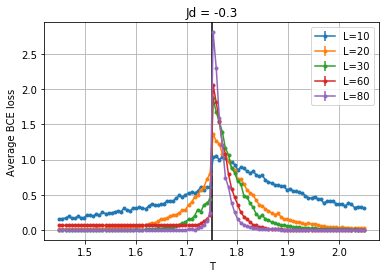

In [110]:
plt.errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

plt.title('Jd = -0.3')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/03_100_bce.png')

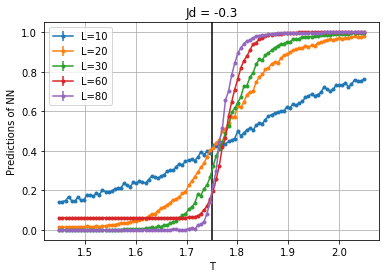

In [111]:
plt.errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', label='L=80')

plt.title('Jd = -0.3')
plt.xlabel('T')
plt.ylabel('Predictions of NN')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/03_100_pred.png')

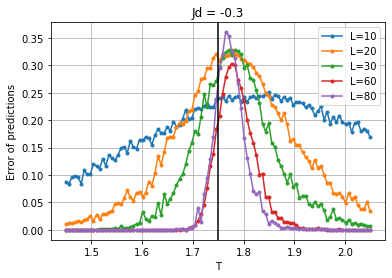

In [112]:
plt.plot(T, stds_err(outs_10), marker='.', label='L=10')
plt.plot(T, stds_err(outs_20), marker='.', label='L=20')
plt.plot(T, stds_err(outs_30), marker='.', label='L=30')
plt.plot(T, stds_err(outs_60), marker='.', label='L=60')
plt.plot(T, stds_err(outs_80), marker='.', label='L=80')

plt.title('Jd = -0.3')
plt.xlabel('T')
plt.ylabel('Error of predictions')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/03_100_ep.png')

In [113]:
######## -0.5 #########

In [5]:
Jd = -0.5

T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

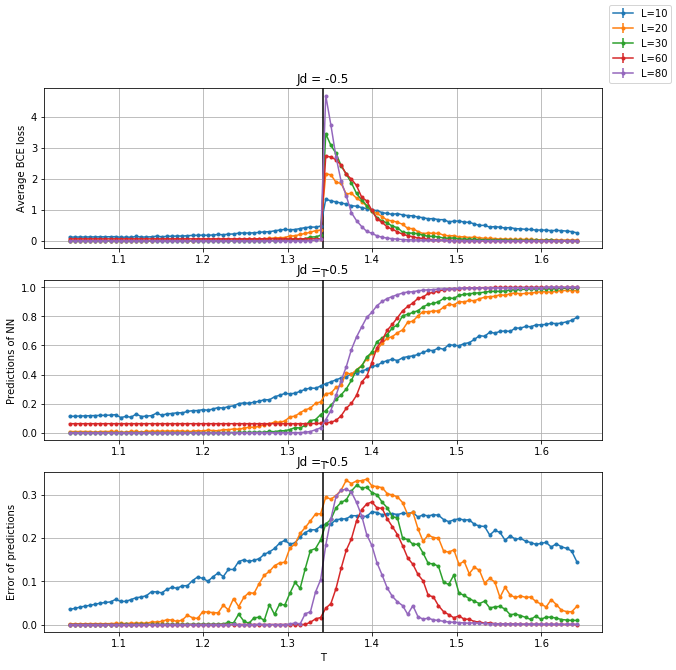

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_60), marker='.')
ax[2].plot(T, stds_err(outs_80), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.5')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

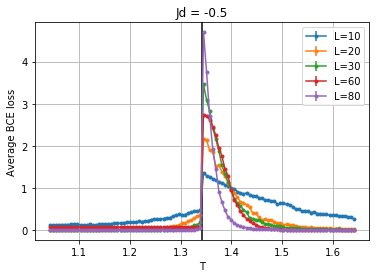

In [116]:
plt.errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

plt.title('Jd = -0.5')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/05_100_bce.png')

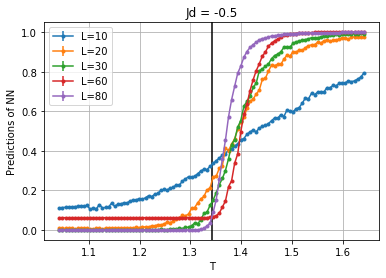

In [117]:
plt.errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.', label='L=20')
plt.errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.', label='L=30')
plt.errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.', label='L=60')
plt.errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.', label='L=80')

plt.title('Jd = -0.5')
plt.xlabel('T')
plt.ylabel('Predictions of NN')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/05_100_pred.png')

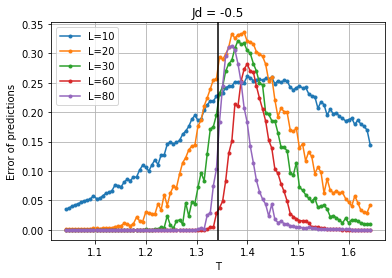

In [118]:
plt.plot(T, stds_err(outs_10), marker='.', label='L=10')
plt.plot(T, stds_err(outs_20), marker='.', label='L=20')
plt.plot(T, stds_err(outs_30), marker='.', label='L=30')
plt.plot(T, stds_err(outs_60), marker='.', label='L=60')
plt.plot(T, stds_err(outs_80), marker='.', label='L=80')

plt.title('Jd = -0.5')
plt.xlabel('T')
plt.ylabel('Error of predictions')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/05_100_ep.png')

In [119]:
####### -0.7 ########

In [120]:
Jd = -0.7

T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

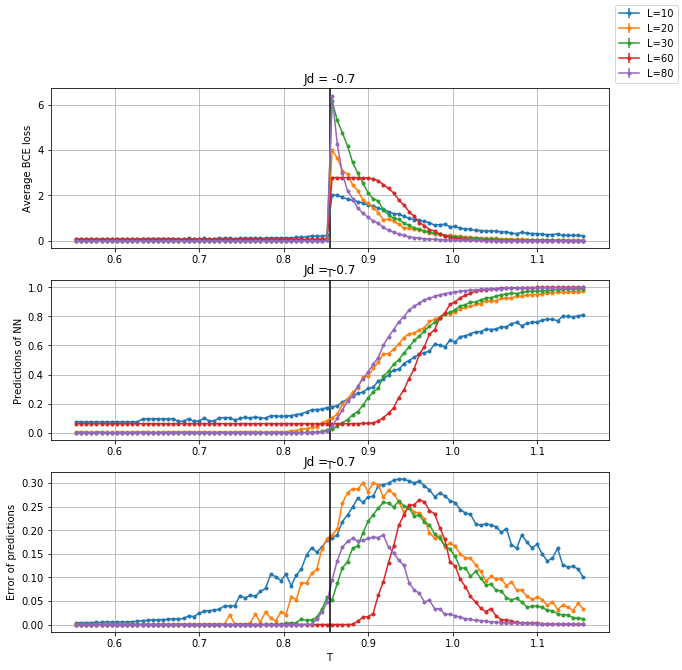

In [121]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_60), marker='.')
ax[2].plot(T, stds_err(outs_80), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.7')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

In [6]:
Jd = -0.8

T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

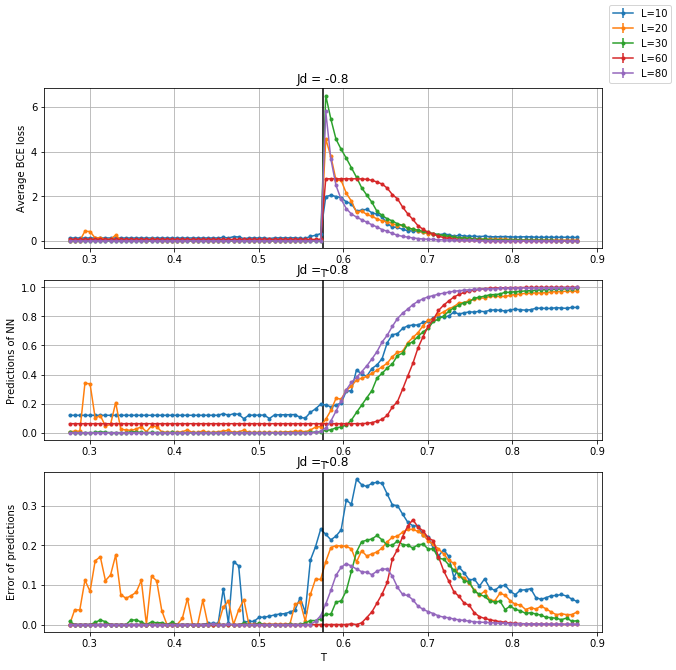

In [7]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_60), marker='.')
ax[2].plot(T, stds_err(outs_80), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.8')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

In [125]:
####### -0.9 ##########

In [18]:
Jd = -0.9

T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_10 = np.load(f)
    
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_20 = np.load(f) 
    
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_30 = np.load(f)
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_30 = np.load(f)
    
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_60 = np.load(f) 

L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 
with open(f'data_outputs/{Jd}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
    outs_80 = np.load(f)

In [127]:
'''fig, ax = plt.subplots(3, 1, figsize=(10,10))

ax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
ax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
ax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
ax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
ax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

ax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')
ax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')
ax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')
ax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.')
ax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.')

ax[2].plot(T, stds_err(outs_10), marker='.')
ax[2].plot(T, stds_err(outs_20), marker='.')
ax[2].plot(T, stds_err(outs_30), marker='.')
ax[2].plot(T, stds_err(outs_60), marker='.')
ax[2].plot(T, stds_err(outs_80), marker='.')

ax[0].axvline(x=T_c, color='black')
ax[1].axvline(x=T_c, color='black')
ax[2].axvline(x=T_c, color='black')

plt.setp(ax, xlabel='T')
ax[0].set_ylabel('Average BCE loss')
ax[1].set_ylabel('Predictions of NN')
ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title='Jd = -0.9')
fig.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()'''

"fig, ax = plt.subplots(3, 1, figsize=(10,10))\n\nax[0].errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')\nax[0].errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')\nax[0].errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')\nax[0].errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')\nax[0].errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')\n\nax[1].errorbar(T, errs(outs_10), yerr=stds_err(outs_10)/1000, marker='.')\nax[1].errorbar(T, errs(outs_20), yerr=stds_err(outs_20)/1000, marker='.')\nax[1].errorbar(T, errs(outs_30), yerr=stds_err(outs_30)/1000, marker='.')\nax[1].errorbar(T, errs(outs_60), yerr=stds_err(outs_60)/1000, marker='.')\nax[1].errorbar(T, errs(outs_80), yerr=stds_err(outs_80)/1000, marker='.')\n\nax[2].plot(T, stds_err(outs_10), marker='.')\nax[2].plot(T, stds_err(outs_20), marker='.')\nax[2].plot(T, stds_err(outs_30), m

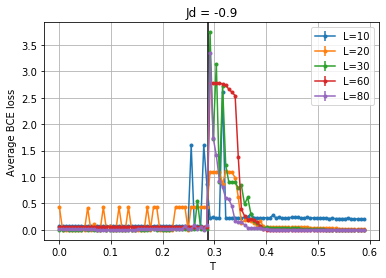

In [132]:
plt.errorbar(T[T>0], errs(errs_10)[T>0], yerr=stds_err(errs_10)[T>0]/1000, marker='.', label='L=10')
plt.errorbar(T[T>0], errs(errs_20)[T>0], yerr=stds_err(errs_20)[T>0]/1000, marker='.', label='L=20')
plt.errorbar(T[T>0], errs(errs_30)[T>0], yerr=stds_err(errs_30)[T>0]/1000, marker='.', label='L=30')
plt.errorbar(T[T>0], errs(errs_60)[T>0], yerr=stds_err(errs_60)[T>0]/1000, marker='.', label='L=60')
plt.errorbar(T[T>0], errs(errs_80)[T>0], yerr=stds_err(errs_80)[T>0]/1000, marker='.', label='L=80')

plt.title('Jd = -0.9')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/09_100_bce.png')

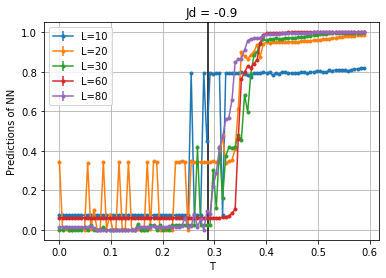

In [8]:
plt.errorbar(T[T>0], errs(outs_10)[T>0], yerr=stds_err(outs_10)[T>0]/1000, marker='.', label='L=10')
plt.errorbar(T[T>0], errs(outs_20)[T>0], yerr=stds_err(outs_20)[T>0]/1000, marker='.', label='L=20')
plt.errorbar(T[T>0], errs(outs_30)[T>0], yerr=stds_err(outs_30)[T>0]/1000, marker='.', label='L=30')
plt.errorbar(T[T>0], errs(outs_60)[T>0], yerr=stds_err(outs_60)[T>0]/1000, marker='.', label='L=60')
plt.errorbar(T[T>0], errs(outs_80)[T>0], yerr=stds_err(outs_80)[T>0]/1000, marker='.', label='L=80')

plt.title('Jd = -0.9')
plt.xlabel('T')
plt.ylabel('Predictions of NN')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/09_100_pred.png')

In [19]:
y_10 = errs(outs_10)[T>0]
y_20 = errs(outs_20)[T>0]
y_30 = errs(outs_30)[T>0]
y_60 = errs(outs_60)[T>0]
y_80 = errs(outs_80)[T>0]
T = np.array(T[T>0])

np.save(f'data_errors/x.npy', T)
np.save(f'data_errors/{Jd}_{10}_{num_temps}_predictions.npy', y_10)
np.save(f'data_errors/{Jd}_{20}_{num_temps}_predictions.npy', y_20)
np.save(f'data_errors/{Jd}_{30}_{num_temps}_predictions.npy', y_30)
np.save(f'data_errors/{Jd}_{60}_{num_temps}_predictions.npy', y_60)
np.save(f'data_errors/{Jd}_{80}_{num_temps}_predictions.npy', y_80)

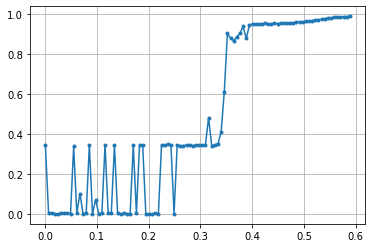

In [17]:
with open(f'data_errors/{Jd}_{60}_{num_temps}_predictions.npy', 'rb') as f:
    y = np.load(f)
with open(f'data_errors/x.npy', 'rb') as f:
    x = np.load(f)
    
plt.plot(x, y, marker='.', label='L=20')

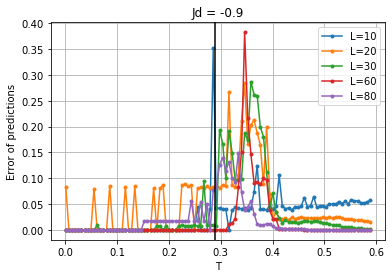

In [134]:
plt.plot(T[T>0], stds_err(outs_10)[T>0], marker='.', label='L=10')
plt.plot(T[T>0], stds_err(outs_20)[T>0], marker='.', label='L=20')
plt.plot(T[T>0], stds_err(outs_30)[T>0], marker='.', label='L=30')
plt.plot(T[T>0], stds_err(outs_60)[T>0], marker='.', label='L=60')
plt.plot(T[T>0], stds_err(outs_80)[T>0], marker='.', label='L=80')

plt.title('Jd = -0.9')
plt.xlabel('T')
plt.ylabel('Error of predictions')
plt.axvline(x=T_c, color='black')
plt.legend()

plt.savefig('images/09_100_ep.png')